In [3]:
import numpy as np
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [5]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


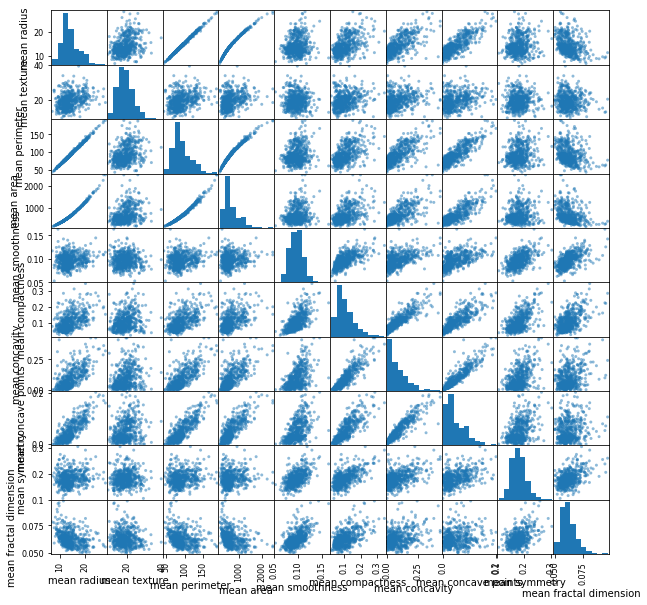

In [9]:
df = pd.DataFrame(data.data[:, 0:10],
                             columns=data.feature_names[0:10])
scatter_matrix(df, figsize=(10, 10));

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


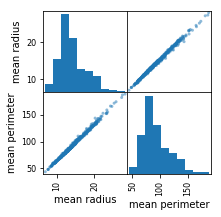

In [15]:
# radiusとperimeterには相関関係がある
# となると、２つの要素は不要で、どちらか片方だけで良い、と考えてよい
df = pd.DataFrame(data.data[:, [0,2]],
                             columns=data.feature_names[[0, 2]])
scatter_matrix(df, figsize=(3, 3));

In [16]:
X = data.data[:, [0,2]]
y = data.target
names = data.feature_names[[0,2]]

In [17]:
X.shape, y.shape

((569, 2), (569,))

Text(0,0.5,'mean perimeter')

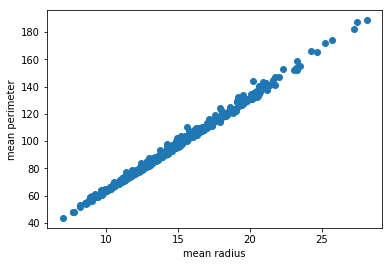

In [19]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel(names[0])
plt.ylabel(names[1])

In [2]:
# 俗にいう、主成分分析のこと
from sklearn.decomposition import PCA

In [3]:
pca = PCA()

In [6]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data[:, [0,2]]
y = data.target
# 主成分分析の変換
pca.fit(X)
X_new = pca.transform(X)

(-60, 120)

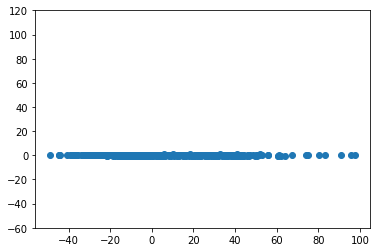

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X_new[:,0],X_new[:,1])
plt.ylim(-60, 120)

In [12]:
# ポイントは分散している方向を第一軸として考えること
pca.explained_variance_

array([6.02807278e+02, 5.21213668e-02])

In [13]:
pca.explained_variance_ / pca.explained_variance_.sum()

array([9.99913543e-01, 8.64569199e-05])

Text(0,0.5,'mean concave points')

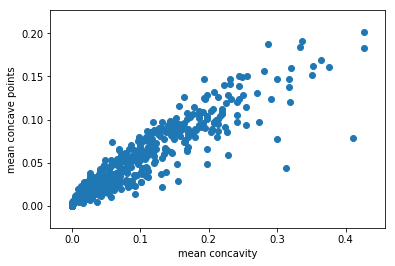

In [15]:
X = data.data[:, [6,7]]
y = data.target
names = data.feature_names[[6,7]]

plt.scatter(X[:,0], X[:,1])
plt.xlabel(names[0])
plt.ylabel(names[1])

(-0.25, 0.25)

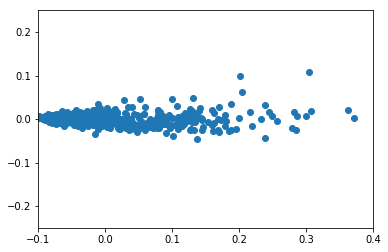

In [16]:
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:,0], X_new[:,1])
plt.xlim(-0.1, 0.4)
plt.ylim(-0.25, 0.25)

In [17]:
pca.explained_variance_

array([0.00767254, 0.00018837])

In [18]:
pca.explained_variance_ratio_ # 寄与率

array([0.97603731, 0.02396269])

In [19]:
# eigで検算
m = X.mean(axis=0)
Xp = (X - m)

In [20]:
C = Xp.transpose().dot(Xp)

In [22]:
import numpy as np
w, _ = np.linalg.eig(C)

In [23]:
w    

array([4.3580028 , 0.10699332])

In [24]:
w / w.sum()

array([0.97603731, 0.02396269])